In [60]:
#Importing Library
import pandas as pd

In [61]:
#Loading dataset
df = pd.read_csv('Iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [62]:
#Checking any zeros available in the dataset
(df==0).sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [63]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [64]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [65]:
#EDA
print(df['species'].value_counts())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


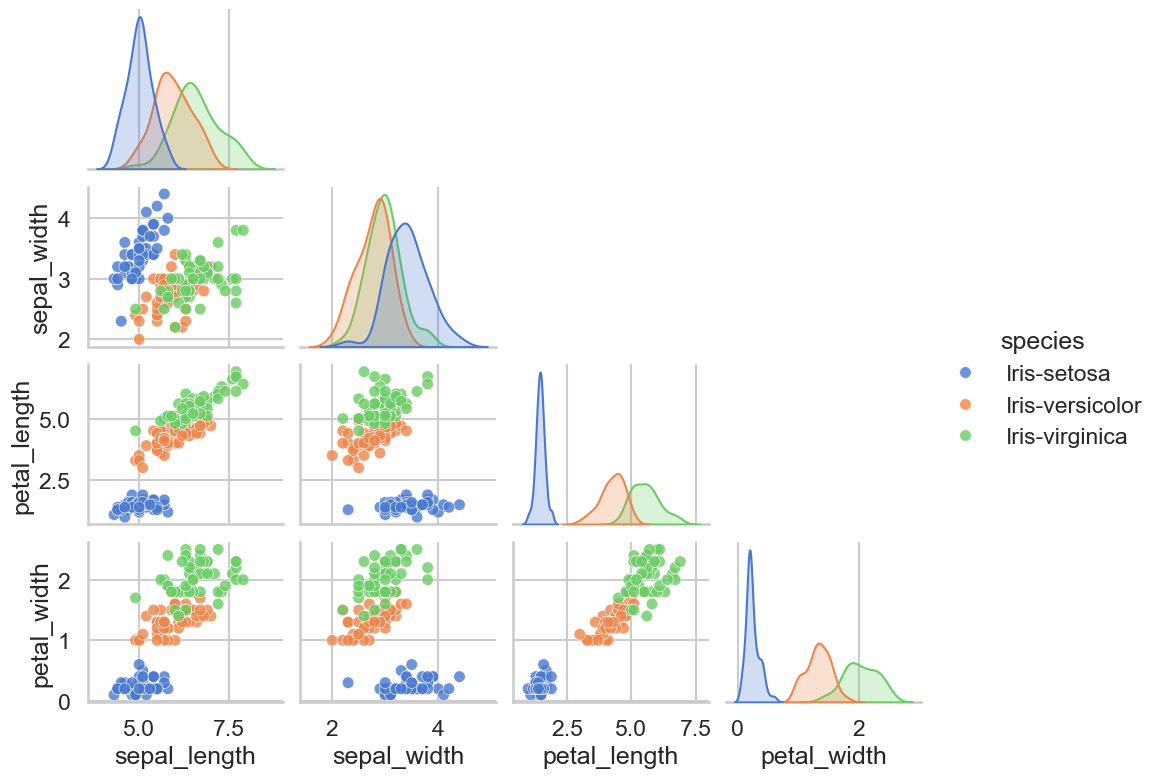

In [66]:
#Pairplot to visualize the relationships
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid',context='talk')
sns.pairplot(df, hue='species',height=2,aspect=1.2,plot_kws={'alpha':0.8,'s':70,'edgecolor':'w','linewidth':0.5},palette='muted',corner=True,diag_kind='kde')

plt.show()


In [67]:
df.columns.tolist()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [68]:
#Preprocessing

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [69]:
#Encoding target labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [70]:
#Preprocessor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns),
        ('cat','passthrough',y)
    ],
    remainder='passthrough'
)

preprocessor

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [71]:
X = preprocessor.fit_transform(X)

In [72]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [73]:
print(f"X_train.shape: {X_train.shape}\n X_test.shape: {X_test.shape}\n y_train.shape: {y_train.shape}\n y_test.shape: {y_test.shape}")

X_train.shape: (120, 154)
 X_test.shape: (30, 154)
 y_train.shape: (120,)
 y_test.shape: (30,)


In [74]:
#Training model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [75]:
y_pred = knn.predict(X_test)


In [76]:
#Performance Evaluation
from sklearn.metrics import accuracy_score, classification_report, f1_score, ConfusionMatrixDisplay

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1-score: {f1_score(y_test, y_pred, average='weighted')}")
print(f"Classification Report:\n {classification_report(y_test,y_pred)}")


Accuracy: 0.9333333333333333
F1-score: 0.9326599326599326
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



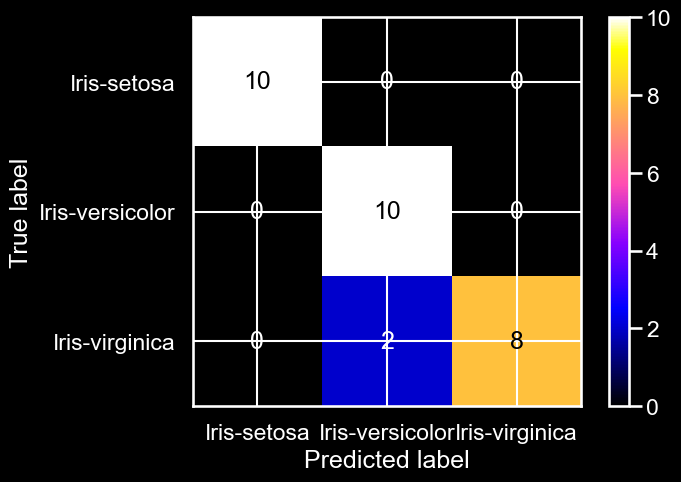

In [78]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='gnuplot2')
plt.style.use('dark_background')
plt.show()